<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.182023,27.477545,55.057855,199.113816,332.831238,258.476679,74.354559
1,0.0,1.0,69.090772,43.203581,36.801797,2722.412880,2881.509030,41.864589,2839.644441
2,0.0,2.0,82.932124,60.813209,75.429720,63.063457,292.238510,-71.416296,363.654806
3,0.0,3.0,58.191736,98.371074,79.286317,13801.831409,14047.680536,-666.774486,14714.455022
4,0.0,4.0,32.486620,39.256709,59.497750,928.888902,1070.129980,78.863355,991.266625
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.103132,98.422181,45.765794,9100.610897,9351.902005,748.905926,8602.996079
119996,999.0,116.0,73.546680,50.017193,35.178856,1225.117260,1393.859989,874.884945,518.975043
119997,999.0,117.0,25.971906,61.985168,29.795401,4853.369671,4981.122146,-86.771846,5067.893992
119998,999.0,118.0,56.618461,81.946539,68.663565,-10598.626313,-10381.397748,-238.633345,-10142.764403


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.182023,27.477545,55.057855,199.113816,332.831238,258.476679,74.354559
1,0.0,1.0,69.090772,43.203581,36.801797,2722.412880,2881.509030,41.864589,2839.644441
2,0.0,2.0,82.932124,60.813209,75.429720,63.063457,292.238510,-71.416296,363.654806
3,0.0,3.0,58.191736,98.371074,79.286317,13801.831409,14047.680536,-666.774486,14714.455022
4,0.0,4.0,32.486620,39.256709,59.497750,928.888902,1070.129980,78.863355,991.266625
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.103132,98.422181,45.765794,9100.610897,9351.902005,748.905926,8602.996079
119996,999.0,116.0,73.546680,50.017193,35.178856,1225.117260,1393.859989,874.884945,518.975043
119997,999.0,117.0,25.971906,61.985168,29.795401,4853.369671,4981.122146,-86.771846,5067.893992
119998,999.0,118.0,56.618461,81.946539,68.663565,-10598.626313,-10381.397748,-238.633345,-10142.764403


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    41.182023  27.477545  ...  258.476679     74.354559
      1.0    69.090772  43.203581  ...   41.864589   2839.644441
      2.0    82.932124  60.813209  ...  -71.416296    363.654806
      3.0    58.191736  98.371074  ... -666.774486  14714.455022
      4.0    32.486620  39.256709  ...   78.863355    991.266625
...                ...        ...  ...         ...           ...
999.0 115.0  97.103132  98.422181  ...  748.905926   8602.996079
      116.0  73.546680  50.017193  ...  874.884945    518.975043
      117.0  25.971906  61.985168  ...  -86.771846   5067.893992
      118.0  56.618461  81.946539  ... -238.633345 -10142.764403
      119.0  49.794211  72.543869  ... -140.954887  -9075.268803

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    41.182023  27.477545  ...  258.476679     74.354559
      1.0    69.090772  43.203581  ...   41.864589   2839.644441
      2.0    82.932124  60.813209  ...  -71.416296    363.654806
      3.0    58.191736  98.371074  ... -666.774486  14714.455022
      4.0    32.486620  39.256709  ...   78.863355    991.266625
...                ...        ...  ...         ...           ...
999.0 115.0  97.103132  98.422181  ...  748.905926   8602.996079
      116.0  73.546680  50.017193  ...  874.884945    518.975043
      117.0  25.971906  61.985168  ...  -86.771846   5067.893992
      118.0  56.618461  81.946539  ... -238.633345 -10142.764403
      119.0  49.794211  72.543869  ... -140.954887  -9075.268803

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.182023,27.477545,55.057855,199.113816,332.831238,258.476679,74.354559
1,0.0,1.0,69.090772,43.203581,36.801797,2722.412880,2881.509030,41.864589,2839.644441
2,0.0,2.0,82.932124,60.813209,75.429720,63.063457,292.238510,-71.416296,363.654806
3,0.0,3.0,58.191736,98.371074,79.286317,13801.831409,14047.680536,-666.774486,14714.455022
4,0.0,4.0,32.486620,39.256709,59.497750,928.888902,1070.129980,78.863355,991.266625
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.103132,98.422181,45.765794,9100.610897,9351.902005,748.905926,8602.996079
119996,999.0,116.0,73.546680,50.017193,35.178856,1225.117260,1393.859989,874.884945,518.975043
119997,999.0,117.0,25.971906,61.985168,29.795401,4853.369671,4981.122146,-86.771846,5067.893992
119998,999.0,118.0,56.618461,81.946539,68.663565,-10598.626313,-10381.397748,-238.633345,-10142.764403


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    41.182023  27.477545  ...  258.476679     74.354559
      1.0    69.090772  43.203581  ...   41.864589   2839.644441
      2.0    82.932124  60.813209  ...  -71.416296    363.654806
      3.0    58.191736  98.371074  ... -666.774486  14714.455022
      4.0    32.486620  39.256709  ...   78.863355    991.266625
...                ...        ...  ...         ...           ...
999.0 115.0  97.103132  98.422181  ...  748.905926   8602.996079
      116.0  73.546680  50.017193  ...  874.884945    518.975043
      117.0  25.971906  61.985168  ...  -86.771846   5067.893992
      118.0  56.618461  81.946539  ... -238.633345 -10142.764403
      119.0  49.794211  72.543869  ... -140.954887  -9075.268803

[120000 rows x 7 columns]

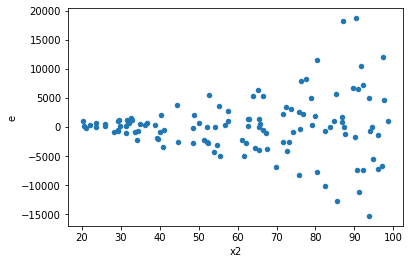

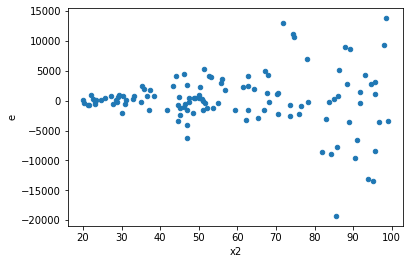

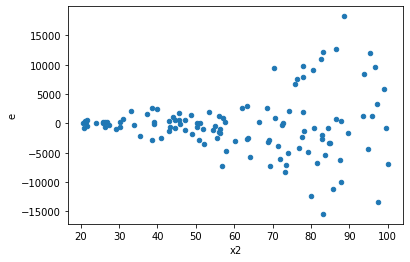

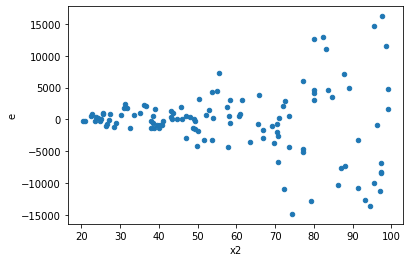

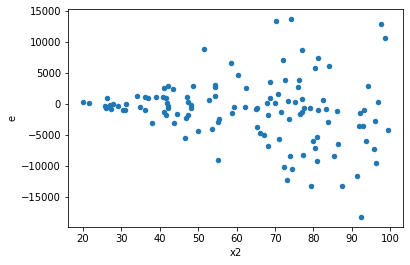

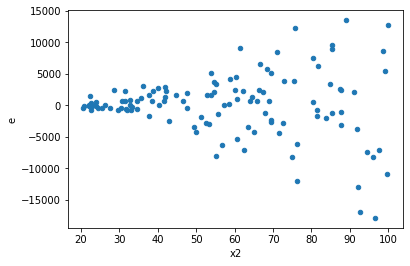

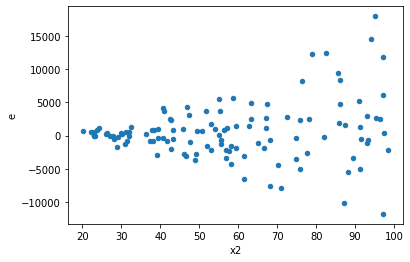

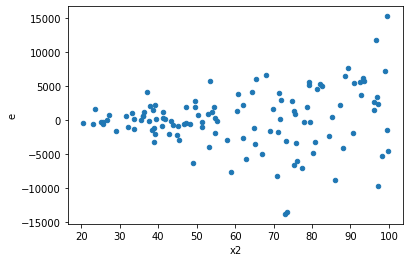

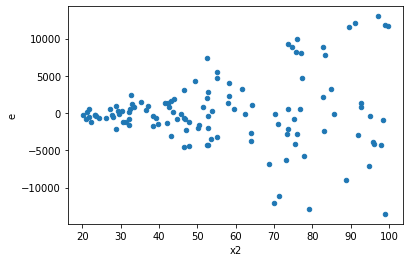

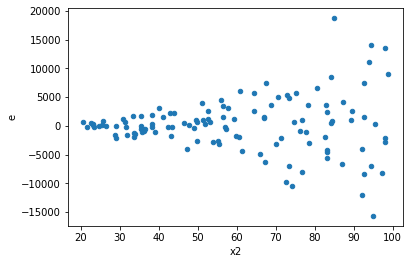

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,70332395.77958344,2302768412.912988,1562942.1284351875,51172631.3980664,32.74121956729151,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,113945139.6621942,3583229977.3855667,2532114.214715427,79627332.83079037,31.446975167247476,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,163377780.63850594,2111025641.0476098,3630617.347522354,46911680.91216911,12.921130601709676,1.6653345369377348e-14,0.9999999999999917,8.326672684688674e-15,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,81074915.57645036,2167834734.976617,1801664.790587786,48174105.2217026,26.73866163859815,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,60349924.600202754,1806274682.697723,1341109.4355600611,40139437.393282734,29.930023851125984,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,72547546.96093845,2473298999.8606586,1612167.7102430768,54962199.996903524,34.09211067043175,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,192716345.0970395,2234210686.4374743,4282585.446600878,49649126.36527721,11.593259955778375,1.3455903058456897e-13,0.9999999999999327,6.727951529228449e-14,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,158636350.19799197,2611211721.683548,3525252.2266220436,58026927.148523286,16.460361817606927,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,105325927.04309586,3568282113.5200567,2340576.156513241,79295158.07822348,33.8784781078645,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,70332395.77958344,2302768412.912988,1562942.1284351875,51172631.3980664,32.74121956729151,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,113945139.6621942,3583229977.3855667,2532114.214715427,79627332.83079037,31.446975167247476,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,163377780.63850594,2111025641.0476098,3630617.347522354,46911680.91216911,12.921130601709676,1.6653345369377348e-14,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,81074915.57645036,2167834734.976617,1801664.790587786,48174105.2217026,26.73866163859815,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,60349924.600202754,1806274682.697723,1341109.4355600611,40139437.393282734,29.930023851125984,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,72547546.96093845,2473298999.8606586,1612167.7102430768,54962199.996903524,34.09211067043175,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,192716345.0970395,2234210686.4374743,4282585.446600878,49649126.36527721,11.593259955778375,1.3455903058456897e-13,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,158636350.19799197,2611211721.683548,3525252.2266220436,58026927.148523286,16.460361817606927,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,105325927.04309586,3568282113.5200567,2340576.156513241,79295158.07822348,33.8784781078645,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64